In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score , recall_score , f1_score , confusion_matrix
from sklearn.metrics import roc_curve , auc
import matplotlib.pyplot as plt
import seaborn as snb

In [2]:
# Load the dataset
df = pd.read_csv('inf.csv')
df = df.drop(['Unnamed: 0'],axis = 1)

# Split the data into features and target variable
X = df.drop(['Pathogen Test Result'],axis = 1)
Y = df['Pathogen Test Result']

# split dataset
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size= 0.3, random_state=2)

In [3]:
# Create KNN and ANN classifiers
knn = KNeighborsClassifier(n_neighbors=5)
ann = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam')

In [4]:
# Train classifiers on training data
knn.fit(X_train, y_train)
ann.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50))

In [5]:
# Make predictions on testing data
knn_preds = knn.predict(X_test)
ann_preds = ann.predict(X_test)

In [6]:
# Combine predictions using majority voting
ensemble_preds = []
for i in range(len(X_test)):
    if knn_preds[i] == ann_preds[i]:
        ensemble_preds.append(knn_preds[i])
    else:
        ensemble_preds.append(knn_preds[i])  # You can also use ann_preds here

In [7]:
# Calculate accuracy of ensemble predictions
ensemble_acc = accuracy_score(y_test, ensemble_preds)
print("Ensemble accuracy:", round(ensemble_acc*100,2),'%')

Ensemble accuracy: 75.83 %


array([[1952,  609],
       [ 734, 2261]], dtype=int64)

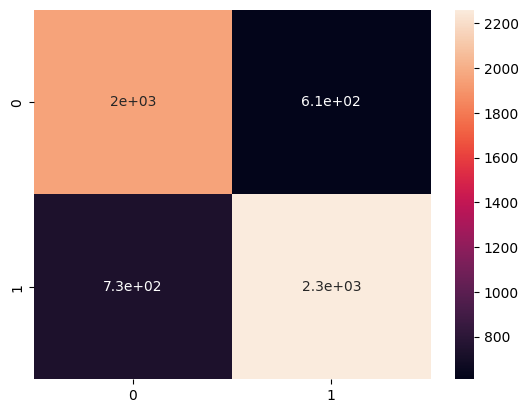

In [8]:
cm = confusion_matrix(y_test, ensemble_preds)
snb.heatmap(cm,annot=True)
cm

In [9]:
# precision for testing
print('for testing : ' , round(precision_score(y_test , ensemble_preds)*100,2),'%')

for testing :  78.78 %


In [10]:
# Recall for testing 
print('for testing : ' , round(recall_score(y_test , ensemble_preds)*100,2),'%')

for testing :  75.49 %


In [11]:
# f1_score for testing 
print('for testing : ' , round(f1_score(y_test , ensemble_preds)*100,2),'%')

for testing :  77.1 %


In [12]:
# for sensitivity and specificity
tn, fp, fn, tp = cm.ravel()

In [13]:
specificity = tn / (tn+fp)
print('specificity for data is : ',round(specificity*100,2),'%')

specificity for data is :  76.22 %


In [14]:
sensitivity = tp / (tp+fn)
print('sensitivity for data is : ',round(sensitivity*100,2),'%')

sensitivity for data is :  75.49 %


In [15]:
#ROC and AUC
fpr, tpr, threshold = roc_curve(y_test,ensemble_preds)
roc_auc = auc(fpr, tpr)

In [16]:
print('Area under curve : ',round(roc_auc*100,2),'%')

Area under curve :  75.86 %


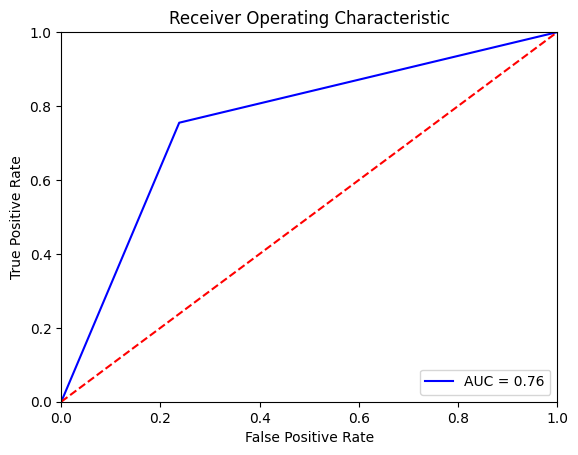

In [17]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()